# Exploratory Data Analysis

## Import data and initial examination

In [9]:
# Import data
import pandas as pd

heartdf = pd.read_csv('heart.csv', header = 0)

# See header of data
heartdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
# Print data frame information
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# Eliminate thal = 0 entries (they don't provide information)
heartdf = heartdf[heartdf['thal'] != 0]
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    int64  
 2   cp        301 non-null    int64  
 3   trestbps  301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    int64  
 6   restecg   301 non-null    int64  
 7   thalach   301 non-null    int64  
 8   exang     301 non-null    int64  
 9   oldpeak   301 non-null    float64
 10  slope     301 non-null    int64  
 11  ca        301 non-null    int64  
 12  thal      301 non-null    int64  
 13  target    301 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.3 KB


In [12]:
# Drop rows with NA values
heartdf.dropna()
heartdf.shape

(301, 14)

In [13]:
# Drop duplicate rows 
heartdf = heartdf.drop_duplicates()
heartdf.shape

(300, 14)

## Cleaning data

### Creating Dummy Variables

In [14]:
# Naming variables before creating dummies
heartdf['sex'] = heartdf['sex'].replace(1, 'male')
heartdf['sex'] = heartdf['sex'].replace(0, 'female')
heartdf['thal'] = heartdf['thal'].replace(1, 'fixed_defect')
heartdf['thal'] = heartdf['thal'].replace(2, 'normal')
heartdf['thal'] = heartdf['thal'].replace(3, 'reversable_defect')
heartdf['cp'] = heartdf['cp'].replace(0, 'asymptomatic')
heartdf['cp'] = heartdf['cp'].replace(1, 'atypical_angina')
heartdf['cp'] = heartdf['cp'].replace(2, 'nonanginal_pain')
heartdf['cp'] = heartdf['cp'].replace(3, 'typical_angina')
heartdf['restecg'] = heartdf['restecg'].replace(0, 'ventricular_hypertrophy')
heartdf['restecg'] = heartdf['restecg'].replace(1, 'normal')
heartdf['restecg'] = heartdf['restecg'].replace(2, 'STT_wave_abnormality')
heartdf['slope'] = heartdf['slope'].replace(0, 'downsloping')
heartdf['slope'] = heartdf['slope'].replace(1, 'flat')
heartdf['slope'] = heartdf['slope'].replace(2, 'upsloping')

heartdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,typical_angina,145,233,1,ventricular_hypertrophy,150,0,2.3,downsloping,0,fixed_defect,1
1,37,male,nonanginal_pain,130,250,0,normal,187,0,3.5,downsloping,0,normal,1
2,41,female,atypical_angina,130,204,0,ventricular_hypertrophy,172,0,1.4,upsloping,0,normal,1
3,56,male,atypical_angina,120,236,0,normal,178,0,0.8,upsloping,0,normal,1
4,57,female,asymptomatic,120,354,0,normal,163,1,0.6,upsloping,0,normal,1


In [15]:
# Create dummy variables and join them to original data frame
heartdf_dummies = pd.get_dummies(heartdf[['sex', 'cp', 'restecg', 'slope', 'thal']])
heartdf = heartdf.drop(columns = ['sex', 'cp','restecg', 'slope', 'thal'], axis=1)
heartdf = heartdf.join(heartdf_dummies, how='left')
heartdf.head()

,age,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,sex_female,...,cp_typical_angina,restecg_STT_wave_abnormality,restecg_normal,restecg_ventricular_hypertrophy,slope_downsloping,slope_flat,slope_upsloping,thal_fixed_defect,thal_normal,thal_reversable_defect
0,63,145,233,1,150,0,2.3,0,1,0,...,1,0,0,1,1,0,0,1,0,0
1,37,130,250,0,187,0,3.5,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,41,130,204,0,172,0,1.4,0,1,1,...,0,0,0,1,0,0,1,0,1,0
3,56,120,236,0,178,0,0.8,0,1,0,...,0,0,1,0,0,0,1,0,1,0
4,57,120,354,0,163,1,0.6,0,1,1,...,0,0,1,0,0,0,1,0,1,0


## Correlation Matrix

In [78]:
# Correlation Matrix
corrMatrix = heartdf.corr()
print(corrMatrix)


                                      age  trestbps      chol       fbs  \
age                              1.000000  0.282915  0.206558  0.122627   
trestbps                         0.282915  1.000000  0.124519  0.181279   
chol                             0.206558  0.124519  1.000000  0.017350   
fbs                              0.122627  0.181279  0.017350  1.000000   
thalach                         -0.397405 -0.049065 -0.007559 -0.011622   
exang                            0.094540  0.069331  0.067042  0.012590   
oldpeak                          0.205844  0.194248  0.048360  0.003622   
ca                               0.301811  0.098451  0.083797  0.151374   
target                          -0.222752 -0.146902 -0.083037 -0.017150   
sex_female                       0.095553  0.058444  0.197782 -0.039160   
sex_male                        -0.095553 -0.058444 -0.197782  0.039160   
cp_asymptomatic                  0.134433  0.022777  0.068044 -0.072214   
cp_atypical_angina       

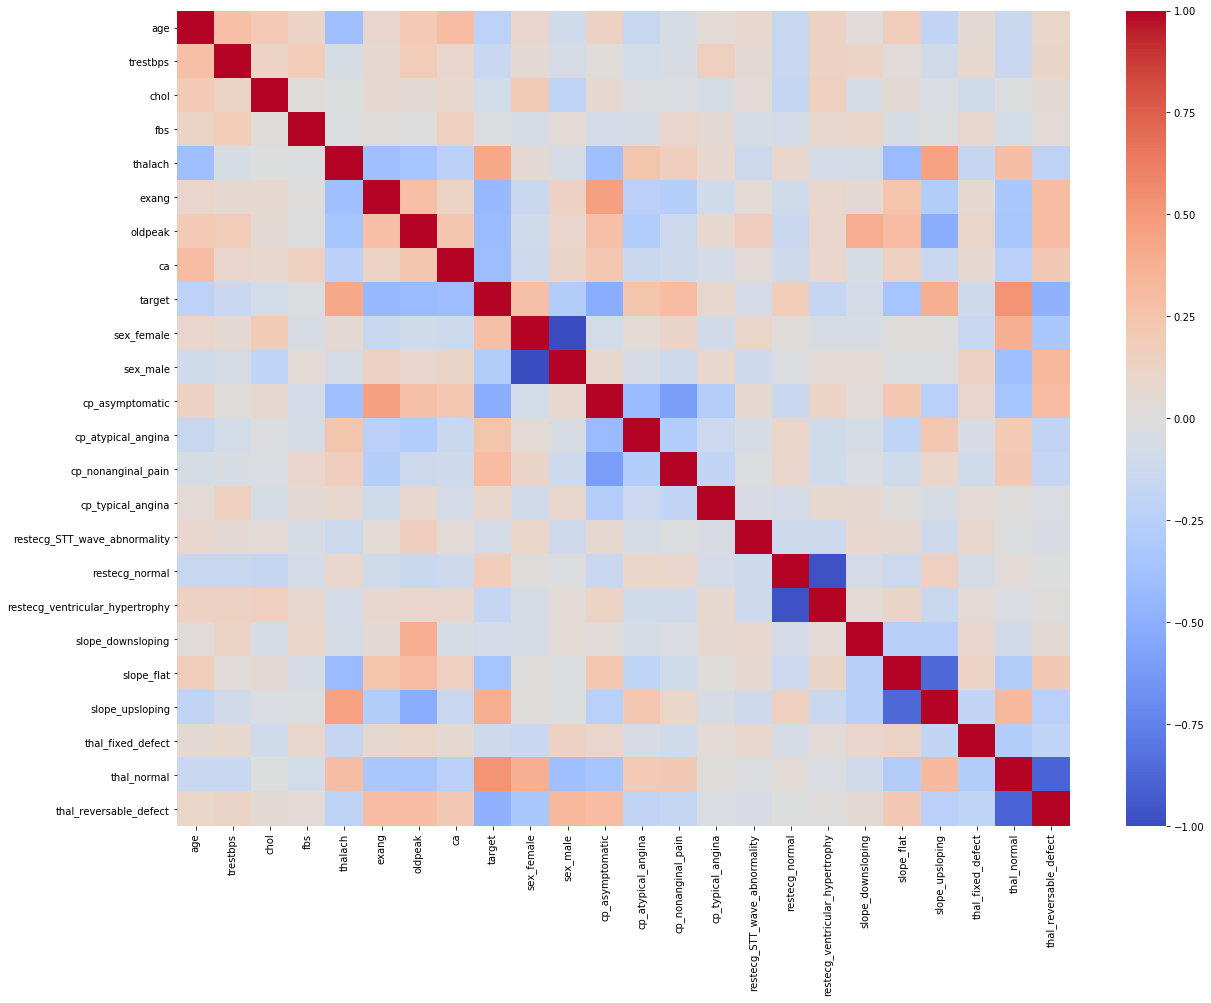

In [82]:
plt.subplots(figsize=(20,15))
heatmap = sns.heatmap(corrMatrix, cmap = 'coolwarm')

## Top 10 correlated pairs

In [129]:
# Getting the top 10 correlated pairs 

# Get top x correlation pairs
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(heartdf, 10))

Top Absolute Correlations
sex_female       sex_male                           1.000000
restecg_normal   restecg_ventricular_hypertrophy    0.973680
thal_normal      thal_reversable_defect             0.883980
slope_flat       slope_upsloping                    0.869158
cp_asymptomatic  cp_nonanginal_pain                 0.596082
target           thal_normal                        0.529301
                 cp_asymptomatic                    0.511360
oldpeak          slope_upsloping                    0.509149
target           thal_reversable_defect             0.488014
exang            cp_asymptomatic                    0.464253
dtype: float64


## Correlation pairs with dependent variable (target)

In [16]:
print("Absolute Correlations with dependent variable")
target_corr = heartdf.corr()['target'][:]
print(target_corr)

Absolute Correlations with dependent variable
age                               -0.222752
trestbps                          -0.146902
chol                              -0.083037
fbs                               -0.017150
thalach                            0.428683
exang                             -0.431575
oldpeak                           -0.428568
ca                                -0.411488
target                             1.000000
sex_female                         0.278841
sex_male                          -0.278841
cp_asymptomatic                   -0.511360
cp_atypical_angina                 0.248393
cp_nonanginal_pain                 0.309136
cp_typical_angina                  0.088114
restecg_STT_wave_abnormality      -0.068456
restecg_normal                     0.180680
restecg_ventricular_hypertrophy   -0.165035
slope_downsloping                 -0.063208
slope_flat                        -0.355938
slope_upsloping                    0.388098
thal_fixed_defect             

#### No variable has high correlation with target variable. There is no need to eliminate any of these.

## Covariance Matrix

In [17]:
covMatrix = heartdf.cov()
print(covMatrix)

                                       age    trestbps         chol       fbs  \
age                              82.386845   45.245931    97.188517  0.394426   
trestbps                         45.245931  310.448785   113.729944  1.131862   
chol                             97.188517  113.729944  2687.127882  0.318707   
fbs                               0.394426    1.131862     0.318707  0.125574   
thalach                         -82.565998  -19.788317    -8.969643 -0.094270   
exang                             0.403122    0.573868     1.632620  0.002096   
oldpeak                           2.174359    3.983032     2.917369  0.001494   
ca                                2.762430    1.749208     4.380256  0.054091   
target                           -1.008807   -1.291460    -2.147703 -0.003032   
sex_female                        0.404125    0.479822     4.777202 -0.006466   
sex_male                         -0.404125   -0.479822    -4.777202  0.006466   
cp_asymptomatic             

In [18]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 302
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              300 non-null    int64  
 1   trestbps                         300 non-null    int64  
 2   chol                             300 non-null    int64  
 3   fbs                              300 non-null    int64  
 4   thalach                          300 non-null    int64  
 5   exang                            300 non-null    int64  
 6   oldpeak                          300 non-null    float64
 7   ca                               300 non-null    int64  
 8   target                           300 non-null    int64  
 9   sex_female                       300 non-null    uint8  
 10  sex_male                         300 non-null    uint8  
 11  cp_asymptomatic                  300 non-null    uint8  
 12  cp_atypical_angina    

## Convert columns to categorical values

In [19]:
for column in ['target', 'sex_female', 'sex_male','cp_asymptomatic', 'cp_atypical_angina', 'cp_nonanginal_pain', 'cp_typical_angina', 
              'restecg_STT_wave_abnormality', 'restecg_normal', 'restecg_ventricular_hypertrophy', 'slope_downsloping', 'slope_flat',
              'slope_upsloping', 'thal_fixed_defect', 'thal_normal', 'thal_reversable_defect', 'fbs', 'exang']:
    heartdf[column] = heartdf[column].astype('category')

In [20]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 302
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   age                              300 non-null    int64   
 1   trestbps                         300 non-null    int64   
 2   chol                             300 non-null    int64   
 3   fbs                              300 non-null    category
 4   thalach                          300 non-null    int64   
 5   exang                            300 non-null    category
 6   oldpeak                          300 non-null    float64 
 7   ca                               300 non-null    int64   
 8   target                           300 non-null    category
 9   sex_female                       300 non-null    category
 10  sex_male                         300 non-null    category
 11  cp_asymptomatic                  300 non-null    category
 12  cp_atypi

In [21]:
# Converting oldpeak to an int value
heartdf['oldpeak'] = 10*heartdf['oldpeak']
heartdf['oldpeak'] = heartdf['oldpeak'].astype('int64')

heartdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 302
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   age                              300 non-null    int64   
 1   trestbps                         300 non-null    int64   
 2   chol                             300 non-null    int64   
 3   fbs                              300 non-null    category
 4   thalach                          300 non-null    int64   
 5   exang                            300 non-null    category
 6   oldpeak                          300 non-null    int64   
 7   ca                               300 non-null    int64   
 8   target                           300 non-null    category
 9   sex_female                       300 non-null    category
 10  sex_male                         300 non-null    category
 11  cp_asymptomatic                  300 non-null    category
 12  cp_atypi

In [22]:
heartdf.to_csv(r'C:\Users\quesal2\Documents\Personal\Cenfotec\Data Science with Python\Python Project\Heart Disease UCI\heartdf.csv',index = False)

# Visualizing Data

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Import data for visualization
df = pd.read_csv('heart.csv', header = 0)

# Drop unwanted rows
df = df[df['thal'] != 0]
df.dropna()
df = df.drop_duplicates()

# Rename variables 
# Naming variables before creating dummies
df['sex'] = df['sex'].replace(1, 'male')
df['sex'] = df['sex'].replace(0, 'female')
df['thal'] = df['thal'].replace(1, 'fixed_defect')
df['thal'] = df['thal'].replace(2, 'normal')
df['thal'] = df['thal'].replace(3, 'reversable_defect')
df['cp'] = df['cp'].replace(0, 'asymptomatic')
df['cp'] = df['cp'].replace(1, 'atypical_angina')
df['cp'] = df['cp'].replace(2, 'nonanginal_pain')
df['cp'] = df['cp'].replace(3, 'typical_angina')
df['restecg'] = df['restecg'].replace(0, 'ventricular_hypertrophy')
df['restecg'] = df['restecg'].replace(1, 'normal')
df['restecg'] = df['restecg'].replace(2, 'STT_wave_abnormality')
df['slope'] = df['slope'].replace(0, 'downsloping')
df['slope'] = df['slope'].replace(1, 'flat')
df['slope'] = df['slope'].replace(2, 'upsloping')
df['target'] = df['target'].replace(0, 'heart_disease')
df['target'] = df['target'].replace(1, 'asymptomatic')

## Bar graphs

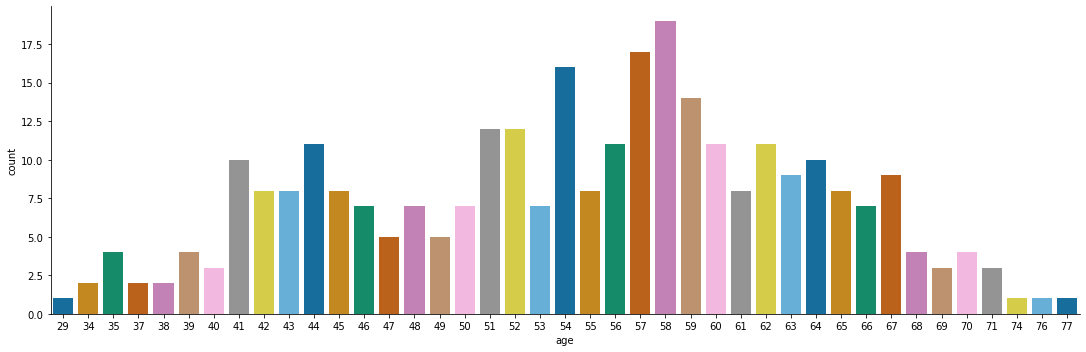

In [114]:
# Bar graph for age category
age_plot = sns.catplot('age', data = df, kind = "count", aspect = 3, palette="colorblind")

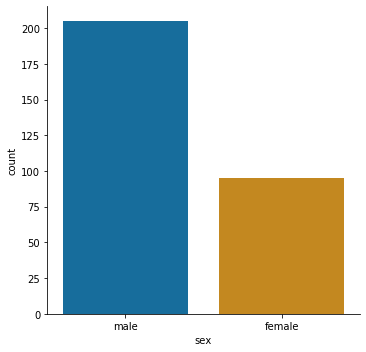

In [115]:
# Bar graph for sex category (Gender (1 = male; 0 = female))
sex_plot = sns.catplot('sex', data = df, kind = "count", aspect = 1, palette="colorblind")

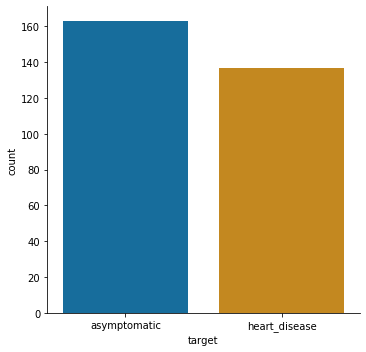

In [116]:
# Bar graph for target category (Gender (1 = male; 0 = female))
target_plot = sns.catplot('target', data = df, kind = "count", aspect = 1, palette="colorblind")

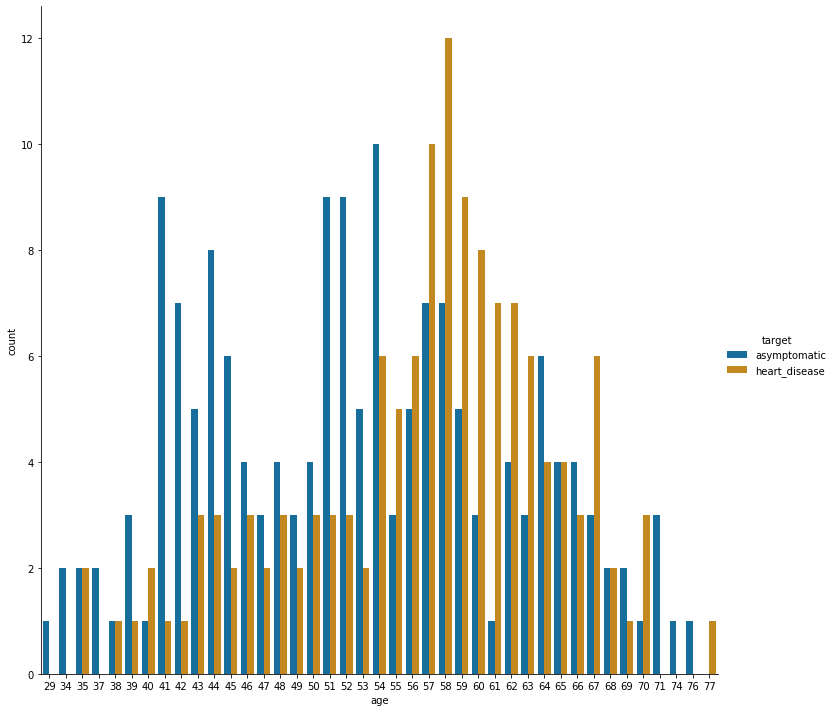

In [117]:
sns.catplot('age', kind='count', hue='target', data=df, palette='colorblind', height=10, aspect=1)

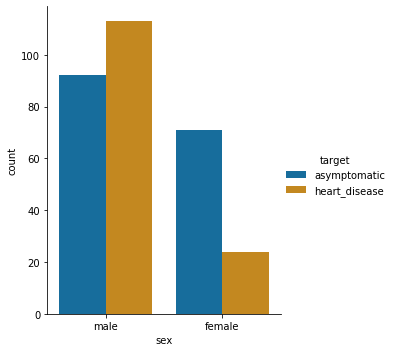

In [118]:
sns.catplot('sex', kind='count', hue='target', data=df, palette='colorblind', height=5, aspect=0.8)

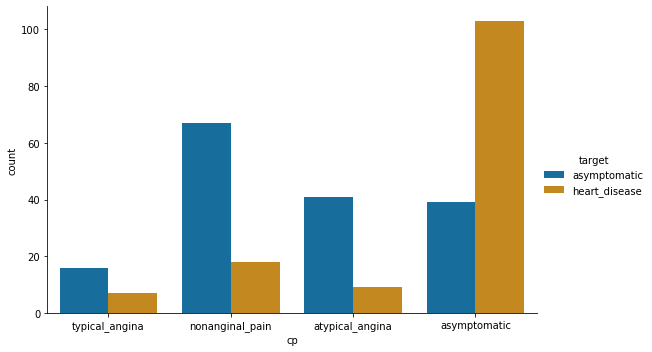

In [119]:
sns.catplot('cp', kind='count', hue='target', data=df, palette='colorblind', height=5, aspect=1.5)

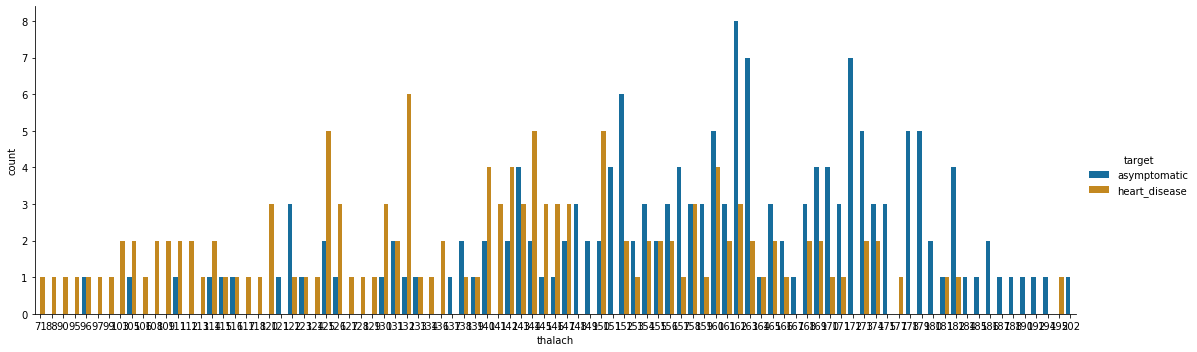

In [120]:
sns.catplot('thalach', kind='count', hue='target', data=df, palette='colorblind', height=5, aspect=3)

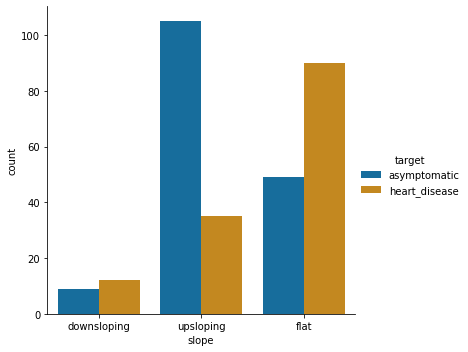

In [121]:
sns.catplot('slope', kind='count', hue='target', data=df, palette='colorblind', height=5, aspect=1)

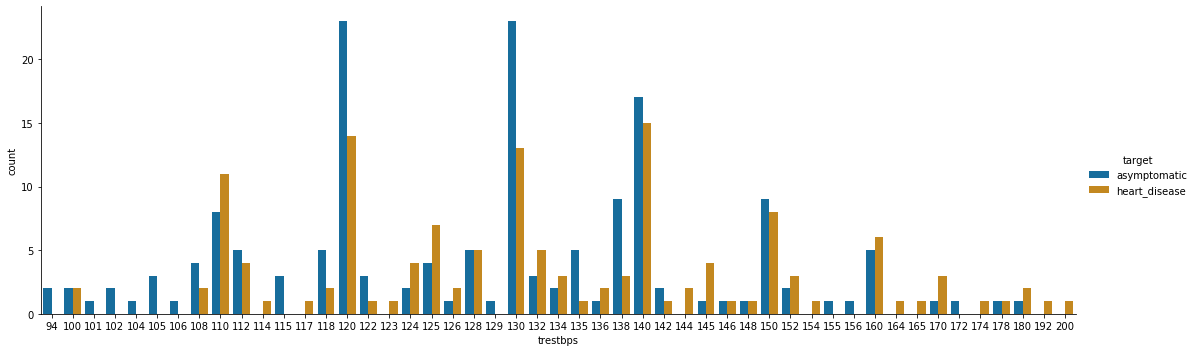

In [122]:
sns.catplot('trestbps', kind='count', hue='target', data=df, palette='colorblind', height=5, aspect=3)

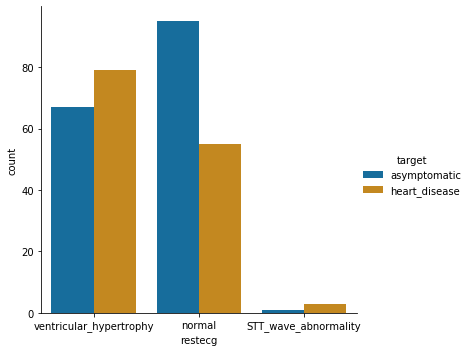

In [123]:
sns.catplot('restecg', kind='count', hue='target', data=df, palette='colorblind', height=5, aspect=1)

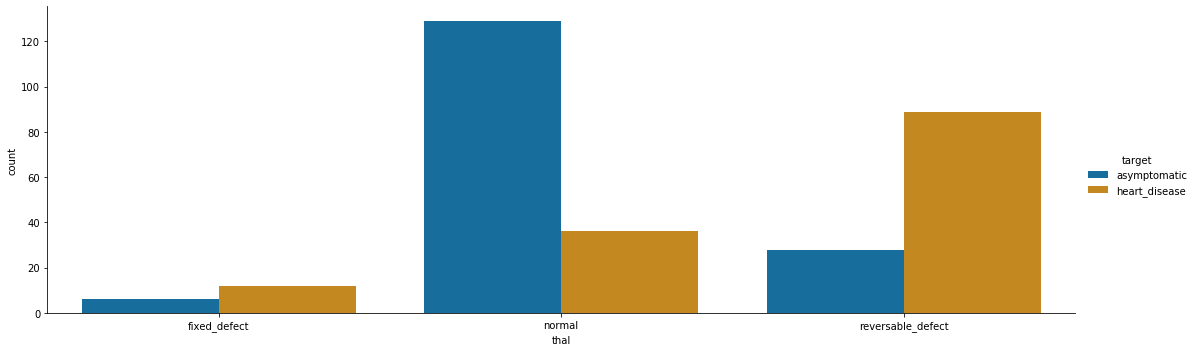

In [124]:
sns.catplot('thal', kind='count', hue='target', data=df, palette='colorblind', height=5, aspect=3)

## Scatter Plots

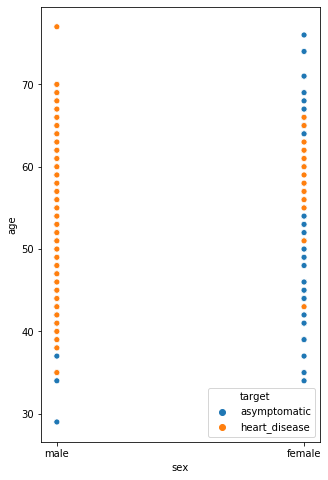

In [125]:
plt.figure(figsize=(5,8))
sns.scatterplot(x=df['sex'],y=df['age'],hue=df['target'])
plt.xlabel('sex')
plt.ylabel('age')
plt.show()

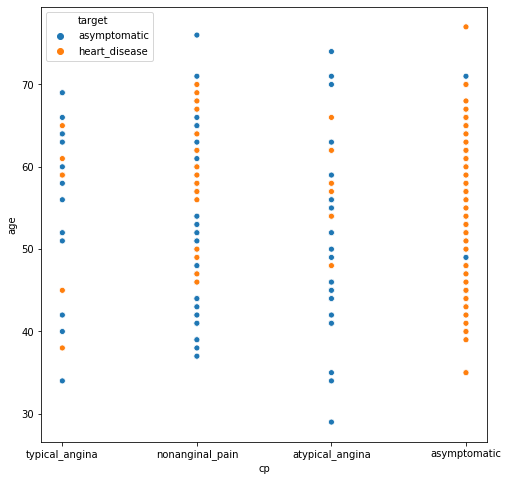

In [126]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df['cp'],y=df['age'],hue=df['target'])
plt.xlabel('cp')
plt.ylabel('age')
plt.show()

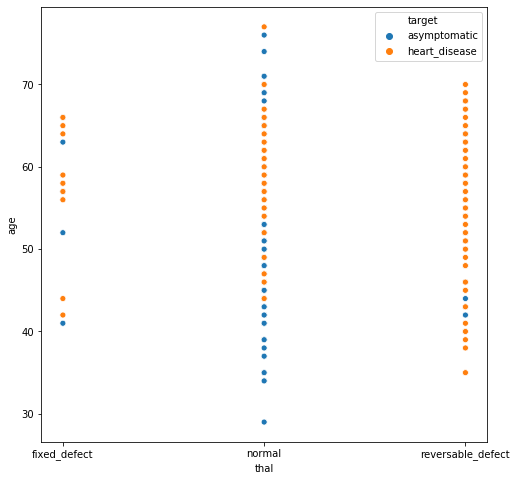

In [127]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df['thal'],y=df['age'],hue=df['target'])
plt.xlabel('thal')
plt.ylabel('age')
plt.show()

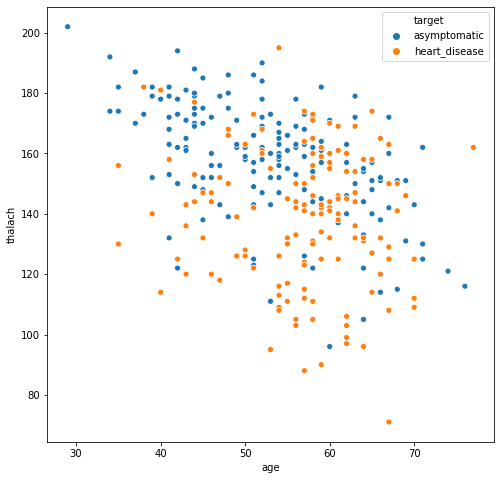

In [128]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df['age'],y=df['thalach'],hue=df['target'])
plt.xlabel('age')
plt.ylabel('thalach')
plt.show()

# Building Models to Predict Heart Disease

## Importing Packages

In [54]:
#Imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import scipy
from math import sqrt

#estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

#preprocessing
from sklearn import preprocessing

import matplotlib.pyplot as plt

## Scale Data

In [24]:
x = heartdf.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
heart_scaled = min_max_scaler.fit_transform(x)
heart_df = pd.DataFrame(heart_scaled)

heartdf_scaled = pd.DataFrame(data=heart_df.values, columns=heartdf.columns)
heartdf_scaled.head()

,age,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,sex_female,...,cp_typical_angina,restecg_STT_wave_abnormality,restecg_normal,restecg_ventricular_hypertrophy,slope_downsloping,slope_flat,slope_upsloping,thal_fixed_defect,thal_normal,thal_reversable_defect
0,0.708333,0.481132,0.244292,1.0,0.603053,0.0,0.370968,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.0,0.885496,0.0,0.564516,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.0,0.770992,0.0,0.225806,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.0,0.816794,0.0,0.129032,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.0,0.702290,1.0,0.096774,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [25]:
heartdf_scaled.shape

(300, 24)

## Recursive Feature Elimination

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# RFECV
X = heartdf_scaled.drop('target', axis=1)
target = heartdf_scaled['target']
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [153]:
selected_rfe_features = pd.DataFrame({'Feature':list(X.columns),
                                     'Ranking':rfecv.ranking_})

print(selected_rfe_features)

                            Feature  Ranking
0                               age        1
1                          trestbps        1
2                              chol        1
3                               fbs        1
4                           thalach        1
5                             exang        1
6                           oldpeak        1
7                                ca        1
8                        sex_female        1
9                          sex_male        1
10                  cp_asymptomatic        1
11               cp_atypical_angina        1
12               cp_nonanginal_pain        1
13                cp_typical_angina        1
14     restecg_STT_wave_abnormality        2
15                   restecg_normal        1
16  restecg_ventricular_hypertrophy        1
17                slope_downsloping        1
18                       slope_flat        1
19                  slope_upsloping        1
20                thal_fixed_defect        1
21        

## Creating Training and Testing Data Sets

In [26]:
#Features 
features = heartdf_scaled.drop('target', axis=1)
print('Summary of feature sample')
features.head()

Summary of feature sample


,age,trestbps,chol,fbs,thalach,exang,oldpeak,ca,sex_female,sex_male,...,cp_typical_angina,restecg_STT_wave_abnormality,restecg_normal,restecg_ventricular_hypertrophy,slope_downsloping,slope_flat,slope_upsloping,thal_fixed_defect,thal_normal,thal_reversable_defect
0,0.708333,0.481132,0.244292,1.0,0.603053,0.0,0.370968,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.0,0.885496,0.0,0.564516,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.0,0.770992,0.0,0.225806,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.0,0.816794,0.0,0.129032,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.0,0.702290,1.0,0.096774,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [27]:
# Dependent variable 
depVar = heartdf_scaled['target']

### Create Training Set

In [28]:
# Training Set (70%)
xtraining_data = (features[:210])
xtraining_data.shape

(210, 23)

In [29]:
# Dependent Variable Training Set (y Training)
depVar_training = depVar[:210]
depVar_training_count = len(depVar_training.index)
print('The number of observations in the Y training set are:',str(depVar_training_count))

The number of observations in the Y training set are: 210


## Create Testing Set

In [30]:
#Testing Set (X Testing)
xtesting_data = features[-91:]
xtesting_data_count = len(xtesting_data.index)
print('The number of observations in the feature testing set is:',str(xtesting_data_count))
xtesting_data.shape

The number of observations in the feature testing set is: 91


(91, 23)

### Establishing Ground Truth

In [31]:
#Ground Truth (y_test) 
depVar_testing = depVar[-91:]
depVar_testing_count = len(depVar_testing.index)
print('The number of observations in the Y training set are:',str(depVar_testing_count))

The number of observations in the Y training set are: 91


## Cross Validation

In [32]:
xtraining_data, xtesting_data, depVar_training, depVar_testing = train_test_split(xtraining_data, depVar_training)
xtraining_data.shape, xtesting_data.shape

((157, 23), (53, 23))

# Building Models

## Random Forest

In [45]:
modelRF = RandomForestClassifier()
modelRF.fit(xtraining_data, depVar_training)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
# Training scores 
print(cross_val_score(modelRF, xtraining_data, depVar_training))

[0.875      0.84375    0.90322581 0.83870968 0.87096774]


In [47]:
# Model Score
modelRF.score(xtraining_data, depVar_training)

1.0

## Support Vector Machine

In [42]:
modelSVC = SVC()
modelSVC.fit(xtraining_data, depVar_training)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
# Training scores 
print(cross_val_score(modelSVC, xtraining_data, depVar_training))

[0.875      0.78125    0.83870968 0.87096774 0.83870968]


In [44]:
# Model Score
modelSVC.score(xtraining_data, depVar_training)

0.9171974522292994

## Stochastic Gradient Descent

In [48]:
modelSGD = SGDClassifier()
modelSGD.fit(xtraining_data, depVar_training)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
# Training scores 
print(cross_val_score(modelSGD, xtraining_data, depVar_training))

[0.75       0.78125    0.83870968 0.87096774 0.83870968]


In [50]:
# Model Score
modelSGD.score(xtraining_data, depVar_training)

0.8280254777070064

# Model Tuning for SVM

## Tuning Kernel

In [33]:
modelSVC2 = SVC(kernel = 'linear')
modelSVC2.fit(xtraining_data, depVar_training)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
# Training scores 
print("Training scores")
print(cross_val_score(modelSVC2, xtraining_data, depVar_training))

Training scores
[0.8125     0.90625    0.87096774 0.87096774 0.90322581]


In [35]:
# Model Score
modelSVC2.score(xtraining_data, depVar_training)

0.9044585987261147

## Tuning C

In [36]:
modelSVC3 = SVC(C=100)
modelSVC3.fit(xtraining_data, depVar_training)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
# Training scores 
print("Training scores")
print(cross_val_score(modelSVC3, xtraining_data, depVar_training))

Training scores
[0.71875    0.875      0.83870968 0.83870968 0.80645161]


In [38]:
# Model Score
modelSVC3.score(xtraining_data, depVar_training)

1.0

In [39]:
modelSVC4 = SVC(C=50)
modelSVC4.fit(xtraining_data, depVar_training)

SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
# Training scores 
print("Training scores")
print(cross_val_score(modelSVC4, xtraining_data, depVar_training))

Training scores
[0.75       0.875      0.83870968 0.83870968 0.80645161]


In [41]:
# Model Score
modelSVC4.score(xtraining_data, depVar_training)

0.9936305732484076

# Prediction and Evaluation of Results

In [52]:
predictionsSVC = modelSVC.predict(xtesting_data)
predRsquaredSVC = r2_score(depVar_testing,predictionsSVC)
rmseSVC5 = sqrt(mean_squared_error(depVar_testing, predictionsSVC))
print('Support Vector Classifier R Squared: %.3f' % predRsquaredSVC)
print('Support Vector Classifier RMSE: %.3f' % rmseSVC5)

Support Vector Classifier R Squared: 0.197
Support Vector Classifier RMSE: 0.336
